In [66]:
# Q1

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score , precision_score, f1_score, recall_score
from scikitplot.metrics import plot_roc, plot_ks_statistic, plot_cumulative_gain
from sklearn.metrics import roc_auc_score, roc_curve, auc
from scipy.stats import ks_2samp
from statsmodels.distributions.empirical_distribution import ECDF
import scikitplot as skplt
import matplotlib.pyplot as plt

class performance_measure:
    def predict_y(self, prob_of_class1, classes, thres=0.5):
        predicted_y = []
        for i in range (len(prob_of_class1)):
            predicted_y.append(np.where(prob_of_class1[i]>thres, classes[1], classes[0]).tolist())

        return predicted_y
    
    
    def confusion_based(self, target_y, predicted_y, class1_label):
        #compute tpr, tnr, fpr, fnr, precision, recall, F1measure
        confusion_matrix(target_y, predicted_y)
        tn, fp, fn, tp = confusion_matrix(target_y, predicted_y).ravel() #just for binary (0,1)
        
        tpr = tp/(tp+fn)
        tnr = tn/(tn+fp)
        fpr = fp/(fp+tn)
        fnr = fn/(tp+fn)
        
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        F1measure = 2*((precision*recall)/(precision+recall))


        result = {"TPR":tpr, "TNR":tnr, "FPR":fpr, "FNR":fnr, "precision":precision, "recall":recall, "F1":F1measure}
        
        return result

# function for average class accuracy   
    def ave_class_accuracy(self, target_y, predicted_y):
       
        confusion_matrix(target_y, predicted_y)
        tn, fp, fn, tp = confusion_matrix(target_y, predicted_y).ravel() #just for binary (0,1)
        
        arithmatic = 0.5 * ((tp/(tp+fn))+ (tn/(tn+fp))) # for just two classes
       
        h = (1/ ((tp/(tp+fn)))+ (1/(tn/(tn+fp))))
        harmonic = 1/(0.5*h) # for just two classes
        
        return {"ave":arithmatic, "HM":harmonic}
    
    
# function for plotting ROC curve and calculating AUC, ROC index, Gini coef
    def roc(self,  target_y, predicted_prob_class1, class1_label):   
        auc = roc_auc_score(target_y, predicted_prob_class1)
        roc_index = auc
        gini = (2*roc_index)-1
#         fpr, tpr, thres=roc_curve(target_y, predicted_prob_class1, class1_label)
#         plt.plot(fpr, tpr)
#         plt.show()

#         #computing auc
#         auc = skplt.metrics.roc_auc_score(fpr, tpr)
#         #computing roc_index
#         for i in range(2, len(thres)):
#         roc_index = sum([(tpr[i]+tpr[i-1])*(fpr[i]-fpr[i-1])])/2
#         #computing gini
#         gini = (2*roc_index)-1

        return {"AUC":auc, "ROC_index":roc_index, "Gini_coef":gini}

    
    
# function for computing and plotting Kolmogorov-Smirnov Statistic
    def KS(self, target_y, predicted_prob_class1):  
        # compute KS statistics KS_stat
        # render a plot of K-S chart in the function (see Figure 12)
        
        KS_stat = skplt.metrics.plot_ks_statistic(target_y, predicted_prob_class1)
        plt.show()
        
        return KS_stat 
    
    
# function for computing and plotting
    def cum_gain(self, target_y, predicted_prob_class1, target_percent, class1_label): 
        
        df = pd.DataFrame()
        df["target_y"] = target_y
        df["prob"] = predicted_prob_class1

        
        df["C1 or not"] = np.array(np.array(target_y) == class1_label, dtype = 'int')
        k = np.sum(np.array(target_y) == class1_label)
        
        df = df.sort_values(by=["prob"], ascending=False)
        
        df["gain"] =  df["C1 or not"].div(k)
        df["cumulative_gain"] = np.cumsum(df.gain)
        print(df)
        
        for i in range(len(target_y)): 
            if df.cumulative_gain.iloc[i] == target_percent:
            
                cum_gain_at_cut_off = df.cumulative_gain.iloc[i]
                score_cutoff = df.prob.iloc[i]
                break
            elif df.cumulative_gain.iloc[i] > target_percent:
                cum_gain_at_cut_off = df.cumulative_gain.iloc[i]
                score_cutoff = df.prob.iloc[i]
                break
            else:
                cum_gain_at_cut_off = 0
                score_cutoff = 0
                
#         skplt.metrics.plot_cumulative_gain(target_y, predicted_prob_class1)
#         plt.show()
        
        return (score_cutoff, cum_gain_at_cut_off)

In [2]:
myanswer=performance_measure() #define an object
classes=( 'false', 'true')
class1_label= 'true'

In [3]:
# Q2 - part a


pred_donation = open('pred_donation.txt','r') #open a file with two models

lines=pred_donation.readlines()  #consider the second column as a model1
Model1Score=[]
for x in lines:
    Model1Score.append(x.split(' ')[2])
del Model1Score[0]
# Model1Score
Model1 = [float(idx) for idx in Model1Score]
#Model1

pred_donation = open('pred_donation.txt','r') #consider the third column as a model2
lines=pred_donation.readlines()
Model2Score=[]
for x in lines:
    Model2Score.append(x.split(' ')[3])
del Model2Score[0]
# Model2Score
Model2 = [float(idx) for idx in Model2Score]
# Model2

pred_donation = open('pred_donation.txt','r') #consider the first column as a target
lines=pred_donation.readlines()
target=[]
for x in lines:
    target.append(x.split(' ')[1])
del target[0]
# target


In [4]:
predic_model1 = myanswer.predict_y(Model1, classes,thres=0.5)
print(predic_model1)



print(myanswer.confusion_based(target,predic_model1,classes[1]))
df = pd.DataFrame(( Model1,predic_model1,target), index=["Model1","predic_model1","target"])
# df.T


['false', 'false', 'true', 'true', 'false', 'true', 'true', 'false', 'false', 'true', 'true', 'true', 'false', 'true', 'false', 'true', 'true', 'false', 'false', 'true', 'true', 'true', 'false', 'true', 'false', 'false', 'true', 'true', 'false', 'true']
{'TPR': 0.8823529411764706, 'TNR': 0.8461538461538461, 'FPR': 0.15384615384615385, 'FNR': 0.11764705882352941, 'precision': 0.8823529411764706, 'recall': 0.8823529411764706, 'F1': 0.8823529411764706}


In [10]:
myanswer.confusion_based(target,predic_model1,'true')

{'TPR': 0.8823529411764706,
 'TNR': 0.8461538461538461,
 'FPR': 0.15384615384615385,
 'FNR': 0.11764705882352941,
 'precision': 0.8823529411764706,
 'recall': 0.8823529411764706,
 'F1': 0.8823529411764706}

In [18]:
from sklearn.metrics import accuracy_score
simple_accuracy = accuracy_score(target, predic_model1)
print("simple_accuracy:",simple_accuracy)

simple_accuracy: 0.8666666666666667


In [21]:
myanswer.confusion_based(target,predic_model2,'true')

{'TPR': 0.8235294117647058,
 'TNR': 0.7692307692307693,
 'FPR': 0.23076923076923078,
 'FNR': 0.17647058823529413,
 'precision': 0.8235294117647058,
 'recall': 0.8235294117647058,
 'F1': 0.8235294117647058}

In [22]:
from sklearn.metrics import accuracy_score
simple_accuracy = accuracy_score(target, predic_model2)
print("simple_accuracy:",simple_accuracy)

simple_accuracy: 0.8


In [5]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn import metrics

# actual = np.random.binomial(1,.9,size = 1000)
# predicted = np.random.binomial(1,.9,size = 1000)

# confusion_matrix = metrics.confusion_matrix(target, predic_model1)

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

# cm_display.plot()
# plt.show()

In [19]:
predic_model2 = myanswer.predict_y(Model2, classes,thres=0.5)
print(predic_model2)

# print(myanswer.confusion_based(target,predic_model2,'class1'))

dg = pd.DataFrame((target, Model1,predic_model1,Model2,predic_model2), index=["target","Model1","predic_model1","Model2","predic_model2"])
dg.T



['false', 'false', 'true', 'true', 'false', 'true', 'true', 'true', 'false', 'true', 'true', 'true', 'true', 'true', 'false', 'false', 'true', 'false', 'true', 'true', 'true', 'true', 'false', 'false', 'false', 'false', 'false', 'true', 'false', 'true']


In [91]:
# import matplotlib.pyplot as plt
# import numpy
# from sklearn import metrics

# actual = np.random.binomial(1,.9,size = 1000)
# predicted = np.random.binomial(1,.9,size = 1000)

# confusion_matrix = metrics.confusion_matrix(target, predic_model2)

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

# cm_display.plot()
# plt.show()

In [60]:
# Q2 - part b

print(myanswer.ave_class_accuracy(target, predic_model1))
print(myanswer.ave_class_accuracy(target, predic_model2))

{'ave': 0.8642533936651584, 'HM': 0.8638743455497381}
{'ave': 0.7963800904977376, 'HM': 0.7954545454545455}


In [36]:
# Q2 - part c
#  model1 because it's average accuracy is higher than model2.

In [28]:
# Q2 - part d

myanswer= performance_measure()
class1_label='true'
myanswer.cum_gain(target, Model1, 0.2, class1_label)


   target_y    prob  C1 or not      gain  cumulative_gain
19    false  0.9800          0  0.000000         0.000000
21     true  0.9693          1  0.058824         0.058824
13     true  0.9326          1  0.058824         0.117647
9     false  0.9231          0  0.000000         0.117647
3      true  0.8645          1  0.058824         0.176471
29     true  0.8224          1  0.058824         0.235294
16     true  0.7677          1  0.058824         0.294118
5      true  0.7600          1  0.058824         0.352941
10     true  0.7563          1  0.058824         0.411765
6      true  0.7519          1  0.058824         0.470588
15     true  0.7165          1  0.058824         0.529412
23     true  0.7047          1  0.058824         0.588235
20     true  0.6562          1  0.058824         0.647059
27     true  0.5713          1  0.058824         0.705882
11     true  0.5664          1  0.058824         0.764706
26     true  0.5440          1  0.058824         0.823529
2      true  0

(0.8224, 0.23529411764705882)

In [29]:
myanswer.cum_gain(target, Model2, 0.2, class1_label)

   target_y    prob  C1 or not      gain  cumulative_gain
6      true  0.9800          1  0.058824         0.058824
21     true  0.9521          1  0.058824         0.117647
5      true  0.9398          1  0.058824         0.176471
13     true  0.9274          1  0.058824         0.235294
27     true  0.9200          1  0.058824         0.294118
10     true  0.9062          1  0.058824         0.352941
12     true  0.8764          1  0.058824         0.411765
29     true  0.8614          1  0.058824         0.470588
7      true  0.8578          1  0.058824         0.529412
2      true  0.8378          1  0.058824         0.588235
16     true  0.8086          1  0.058824         0.647059
20     true  0.7843          1  0.058824         0.705882
11     true  0.7301          1  0.058824         0.764706
3      true  0.7160          1  0.058824         0.823529
18    false  0.5809          0  0.000000         0.823529
19    false  0.5783          0  0.000000         0.823529
9     false  0

(0.9274, 0.23529411764705882)

In [67]:
# Q2 - part f

print(myanswer.roc(target, Model1, class1_label))
print(myanswer.roc(target, Model2, class1_label))


{'AUC': 0.8144796380090498, 'ROC_index': 0.8144796380090498, 'Gini_coef': 0.6289592760180995}
{'AUC': 0.9592760180995474, 'ROC_index': 0.9592760180995474, 'Gini_coef': 0.9185520361990949}


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass pos_label=true as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
No handles with labels found to put in legend.


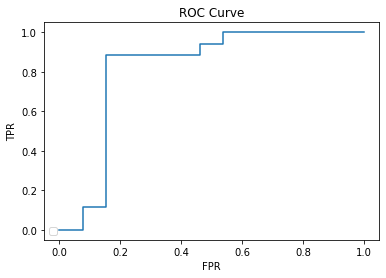

In [30]:
fpr, tpr, thres = skplt.metrics.roc_curve(target, Model1, class1_label)


plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc = 'lower left')
plt.show()

In [32]:
# Q3 - part a

myanswer=performance_measure() #define an object

TCF10foldCV_known_SNP_PC = pd.read_csv('TCF10foldCV_known_SNP_PC.csv')
target_y = TCF10foldCV_known_SNP_PC["testy"]
prob_of_class1 = TCF10foldCV_known_SNP_PC["prob"]
classes = ("control","type2diabetes")
class1_label = "type2diabetes"
predicted_y = myanswer.predict_y(prob_of_class1, classes, thres=0.5)
predicted_y
predicted_prob_class1 = prob_of_class1
target_percent = 0.5

In [38]:
# myanswer.predict_y(prob_of_class1, classes, thres= 0.5)

In [34]:
myanswer.confusion_based(target_y, predicted_y, class1_label)

{'TPR': 0.5811345646437994,
 'TNR': 0.7425414364640884,
 'FPR': 0.2574585635359116,
 'FNR': 0.4188654353562005,
 'precision': 0.6540460282108389,
 'recall': 0.5811345646437994,
 'F1': 0.6154383513796716}

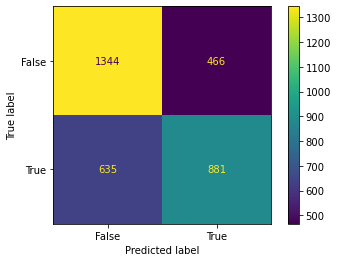

In [40]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn import metrics

# actual = np.random.binomial(1,.9,size = 1000)
# predicted = np.random.binomial(1,.9,size = 1000)

# confusion_matrix = metrics.confusion_matrix(target_y, predicted_y)

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

# cm_display.plot()
# plt.show()

In [39]:
from sklearn.metrics import accuracy_score
simple_accuracy = accuracy_score(target_y, predicted_y)
print("simple_accuracy:",simple_accuracy)

simple_accuracy: 0.6689717378232111


In [35]:
myanswer.ave_class_accuracy(target_y, predicted_y)

{'ave': 0.6618380005539439, 'HM': 0.6519971564769167}

In [36]:
myanswer.roc(target_y, predicted_prob_class1, class1_label)  



{'AUC': 0.7340967069490809,
 'ROC_index': 0.7340967069490809,
 'Gini_coef': 0.4681934138981618}

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass pos_label=type2diabetes as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
No handles with labels found to put in legend.


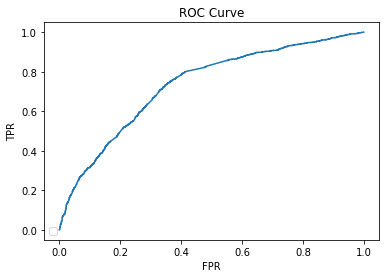

In [37]:
fpr, tpr, thres = skplt.metrics.roc_curve(target_y, predicted_prob_class1, class1_label)

plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc = 'lower left')
plt.show()

In [43]:
# myanswer.KS(target_y, predicted_prob_class1)  
# plt.show()


In [54]:
# skplt.metrics.plot_ks_statistic(target_y, predicted_y)
# plt.show()

In [55]:
# fpr, tpr, thres=roc_curve(target_y, predicted_prob_class1, pos_label=class1_label)
# plt.plot(thres, predicted_y[:1131])
# plt.show()

In [83]:
myanswer.cum_gain(target_y, predicted_prob_class1, target_percent, class1_label) 



           target_y      prob  C1 or not     gain  cumulative_gain
1934  type2diabetes  0.964814          1  0.00066         0.000660
3251  type2diabetes  0.964211          1  0.00066         0.001319
639   type2diabetes  0.959630          1  0.00066         0.001979
1846  type2diabetes  0.959479          1  0.00066         0.002639
316   type2diabetes  0.959440          1  0.00066         0.003298
...             ...       ...        ...      ...              ...
1841        control  0.110031          0  0.00000         0.999340
765         control  0.109635          0  0.00000         0.999340
1769        control  0.109588          0  0.00000         0.999340
3076        control  0.105584          0  0.00000         0.999340
3244  type2diabetes  0.103624          1  0.00066         1.000000

[3326 rows x 5 columns]


(0.623631027220441, 0.5006596306068546)

In [59]:
# Q3 - part b

myanswer=performance_measure() #define an object

glmnet10foldCV_known_SNP_PC = pd.read_csv('glmnet10foldCV_known_SNP_PC.csv')
target_y = glmnet10foldCV_known_SNP_PC["testy"]
prob_of_class1 = glmnet10foldCV_known_SNP_PC["prob"]
classes = ("control","type2diabetes")
class1_label = "control"
predicted_y = myanswer.predict_y(prob_of_class1, classes, thres=0.5)
predicted_y
predicted_prob_class1 = prob_of_class1
target_percent = 0.5


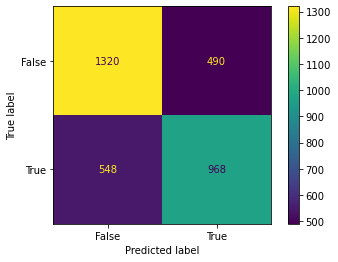

In [61]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn import metrics

# actual = np.random.binomial(1,.9,size = 1000)
# predicted = np.random.binomial(1,.9,size = 1000)

# confusion_matrix = metrics.confusion_matrix(target_y, predicted_y)

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

# cm_display.plot()
# plt.show()

In [64]:
from sklearn.metrics import accuracy_score
simple_accuracy = accuracy_score(target_y, predicted_y)
print("simple_accuracy:",simple_accuracy)

simple_accuracy: 0.687913409500902


In [67]:
myanswer.confusion_based(target_y, predicted_y, class1_label)

{'TPR': 0.6385224274406333,
 'TNR': 0.7292817679558011,
 'FPR': 0.27071823204419887,
 'FNR': 0.36147757255936674,
 'precision': 0.663923182441701,
 'recall': 0.6385224274406333,
 'F1': 0.6509751176866174}

In [68]:
myanswer.ave_class_accuracy(target_y, predicted_y)

{'ave': 0.6839020976982172, 'HM': 0.6808909730363424}

In [69]:
myanswer.roc(target_y, predicted_prob_class1, class1_label)  

{'AUC': 0.7479824778786863,
 'ROC_index': 0.7479824778786863,
 'Gini_coef': 0.49596495575737265}

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass pos_label=control as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
No handles with labels found to put in legend.


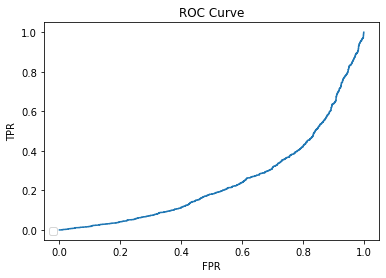

In [72]:
fpr, tpr, thres = skplt.metrics.roc_curve(target_y, predicted_prob_class1, class1_label)

plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc = 'lower left')
plt.show()

In [70]:
myanswer.cum_gain(target_y, predicted_prob_class1, target_percent, class1_label) 

           target_y      prob  C1 or not      gain  cumulative_gain
1239  type2diabetes  0.929787          0  0.000000         0.000000
2518  type2diabetes  0.928307          0  0.000000         0.000000
316   type2diabetes  0.923263          0  0.000000         0.000000
2184  type2diabetes  0.922698          0  0.000000         0.000000
2956  type2diabetes  0.920426          0  0.000000         0.000000
...             ...       ...        ...       ...              ...
152         control  0.123267          1  0.000552         0.997790
765         control  0.121492          1  0.000552         0.998343
2787        control  0.117939          1  0.000552         0.998895
1013        control  0.116792          1  0.000552         0.999448
2381        control  0.096212          1  0.000552         1.000000

[3326 rows x 5 columns]


(0.296586270743451, 0.5000000000000062)

In [52]:
# Q4



